# 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [33]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [34]:
# 그래프 스타일
plt.style.use("ggplot")

# 운영체제에 맞는 폰트 불러오기
font_family = get_font_family()

# 폰트 설정
plt.rc("font", family= font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 팬오션 일별시세

In [12]:
# 팬오션 : 028670
df = fdr.DataReader("028670", "2020", "2021")
df.shape

(248, 6)

In [13]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,4530,4535,4440,4460,1079464,-0.018702
2020-01-03,4460,4555,4440,4500,921814,0.008969
2020-01-06,4450,4450,4320,4380,1140640,-0.026667
2020-01-07,4425,4430,4355,4410,1002069,0.006849
2020-01-08,4340,4395,4200,4250,2046417,-0.036281


# 전일 대비 수익률

## Change 값 직접 구하기

In [14]:
# Change = (종가 / 전일종가) - 1
df["Close"] / df["Close"].shift(1) -1 # shift 한 칸씩 데이터가 밀림

Date
2020-01-02         NaN
2020-01-03    0.008969
2020-01-06   -0.026667
2020-01-07    0.006849
2020-01-08   -0.036281
                ...   
2020-12-23    0.015695
2020-12-24    0.041943
2020-12-28    0.023305
2020-12-29    0.010352
2020-12-30    0.028689
Name: Close, Length: 248, dtype: float64

## pct_change 값 직접 구하기

In [15]:
# pct_change = (종가/전일종가) - 1
df["pct_change"] = df["Close"].pct_change()
df.head()

,Open,High,Low,Close,Volume,Change,pct_change
Date,,,,,,,
2020-01-02,4530,4535,4440,4460,1079464,-0.018702,NaN
2020-01-03,4460,4555,4440,4500,921814,0.008969,0.008969
2020-01-06,4450,4450,4320,4380,1140640,-0.026667,-0.026667
2020-01-07,4425,4430,4355,4410,1002069,0.006849,0.006849
2020-01-08,4340,4395,4200,4250,2046417,-0.036281,-0.036281


In [16]:
# Diff 값
df["Diff"] = df["Close"].diff()

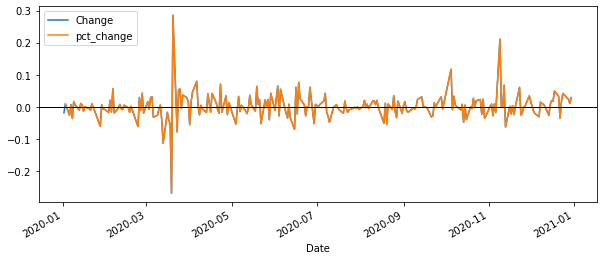

In [18]:
a= df[["Change","pct_change"]].plot(figsize=(10,4))
plt.axhline(0, c="k", lw=1)

## diff를 통한 증감

In [19]:
# 이전 데이터와 다음 데이터의 차이
df["Close"].diff()

Date
2020-01-02      NaN
2020-01-03     40.0
2020-01-06   -120.0
2020-01-07     30.0
2020-01-08   -160.0
              ...  
2020-12-23     70.0
2020-12-24    190.0
2020-12-28    110.0
2020-12-29     50.0
2020-12-30    140.0
Name: Close, Length: 248, dtype: float64

In [20]:
# Shift로 구하기
df["Close"] - df["Close"].shift(1)

Date
2020-01-02      NaN
2020-01-03     40.0
2020-01-06   -120.0
2020-01-07     30.0
2020-01-08   -160.0
              ...  
2020-12-23     70.0
2020-12-24    190.0
2020-12-28    110.0
2020-12-29     50.0
2020-12-30    140.0
Name: Close, Length: 248, dtype: float64

# 누적 수익률

- 일별 수익률을 누적곱으로 계산

In [23]:
cum_daily_return = (df["Change"] + 1).cumprod()

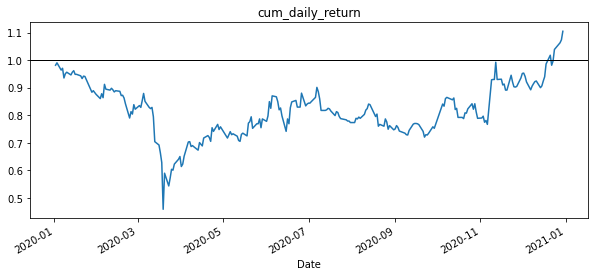

In [27]:
a= cum_daily_return.plot(figsize=(10,4), title="cum_daily_return")
plt.axhline(1, c="k", lw=1)

# 이동평균

## 단순이동평균(SMA)

In [30]:
# 윈도우 7 단순 이동평균
df["SMA7"] = df["Close"].rolling(7).mean()

# 윈도우 14 단순 이동평균
df["SMA14"] = df["Close"].rolling(14).mean()

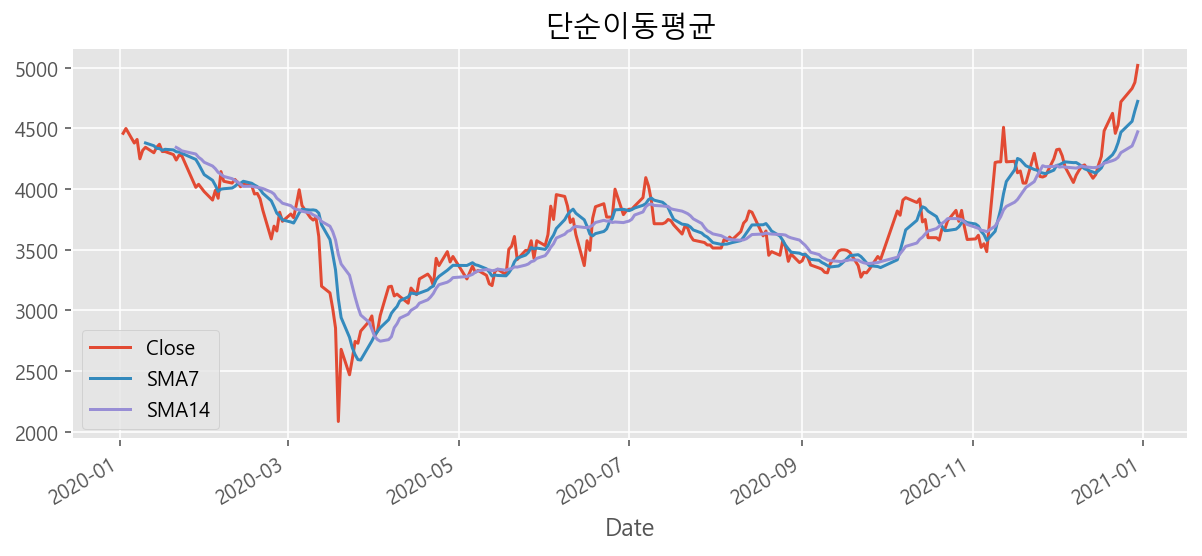

In [35]:
a =df[["Close","SMA7","SMA14"]].plot(figsize=(10,4), title="단순이동평균")

## 누적이동평균(CMA)

In [37]:
df["CMA"] = df["Close"].expanding().mean()

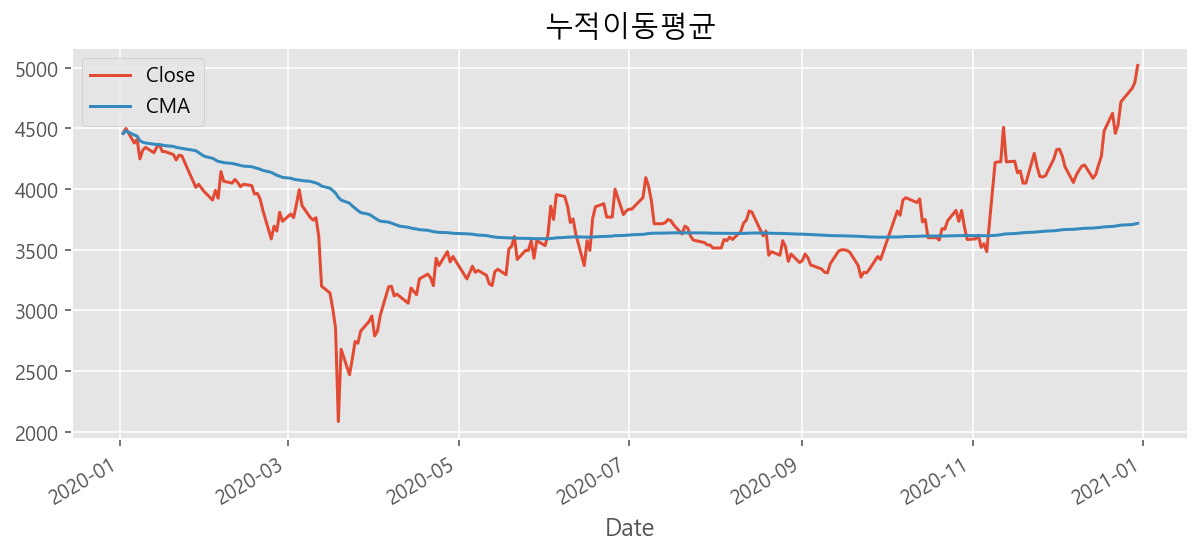

In [38]:
a = df[["Close", "CMA"]].plot(figsize=(10,4), title="누적이동평균")

## 지수이동평균(Exponential weighted moving)

- 최근 자료에 가중치를 부여하여 최근 가격 변동을 나타냄

In [41]:
df["EWM_short"] = df["Close"].ewm(span=12).mean()
df["EWM_long"] = df["Close"].ewm(span=26).mean()

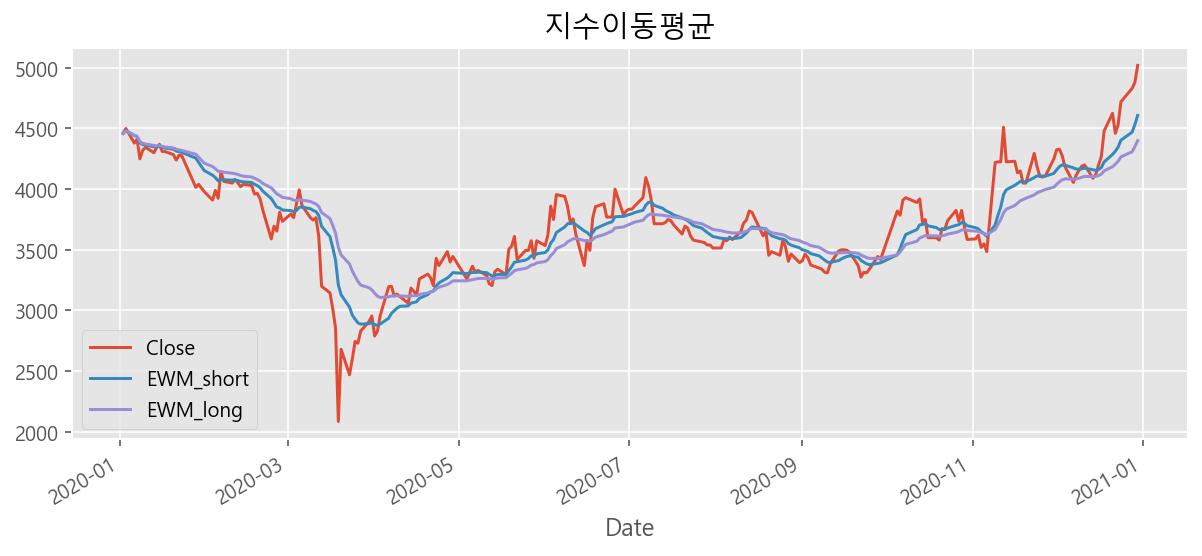

In [43]:
df[["Close","EWM_short","EWM_long"]].plot(figsize=(10,4), title="지수이동평균")

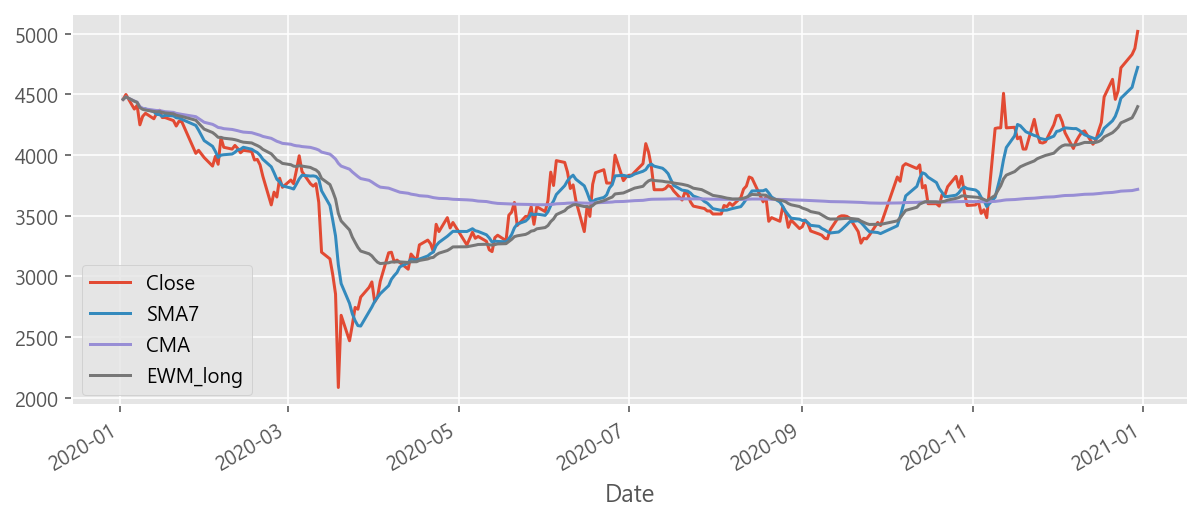

In [44]:
# 이동평균들 비교
df[["Close","SMA7","CMA","EWM_long"]].plot(figsize=(10,4))

# 샘플링

## asfreq

- 특정 주기 데이터를 반환

In [46]:
df["Close"]

Date
2020-01-02    4460
2020-01-03    4500
2020-01-06    4380
2020-01-07    4410
2020-01-08    4250
              ... 
2020-12-23    4530
2020-12-24    4720
2020-12-28    4830
2020-12-29    4880
2020-12-30    5020
Name: Close, Length: 248, dtype: int64

In [45]:
df["Close"].asfreq("D") # 거래일이 아닌 날도 NaN으로 출력

Date
2020-01-02    4460.0
2020-01-03    4500.0
2020-01-04       NaN
2020-01-05       NaN
2020-01-06    4380.0
               ...  
2020-12-26       NaN
2020-12-27       NaN
2020-12-28    4830.0
2020-12-29    4880.0
2020-12-30    5020.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [47]:
# 결측치 채우기
df["Close"].asfreq("D").fillna(method="ffill") # 이전 영업일 데이터로 결측치 채움

Date
2020-01-02    4460.0
2020-01-03    4500.0
2020-01-04    4500.0
2020-01-05    4500.0
2020-01-06    4380.0
               ...  
2020-12-26    4720.0
2020-12-27    4720.0
2020-12-28    4830.0
2020-12-29    4880.0
2020-12-30    5020.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [48]:
# 특정 주기 단위로 샘플링
df["Close"].asfreq("4D") # 4일

Date
2020-01-02    4460.0
2020-01-06    4380.0
2020-01-10    4345.0
2020-01-14    4345.0
2020-01-18       NaN
               ...  
2020-12-11    4200.0
2020-12-15    4120.0
2020-12-19       NaN
2020-12-23    4530.0
2020-12-27       NaN
Freq: 4D, Name: Close, Length: 91, dtype: float64

In [49]:
# 월단위 샘플링
df["Close"].asfreq("M")

Date
2020-01-31    3980.0
2020-02-29       NaN
2020-03-31    2955.0
2020-04-30       NaN
2020-05-31       NaN
2020-06-30    3820.0
2020-07-31    3515.0
2020-08-31    3395.0
2020-09-30       NaN
2020-10-31       NaN
2020-11-30    4250.0
Freq: M, Name: Close, dtype: float64

## resample

- 특정 주기의 그룹화된 데이터 반환

In [50]:
# 일간 평균
df["Close"].resample("D").mean()

Date
2020-01-02    4460.0
2020-01-03    4500.0
2020-01-04       NaN
2020-01-05       NaN
2020-01-06    4380.0
               ...  
2020-12-26       NaN
2020-12-27       NaN
2020-12-28    4830.0
2020-12-29    4880.0
2020-12-30    5020.0
Freq: D, Name: Close, Length: 364, dtype: float64

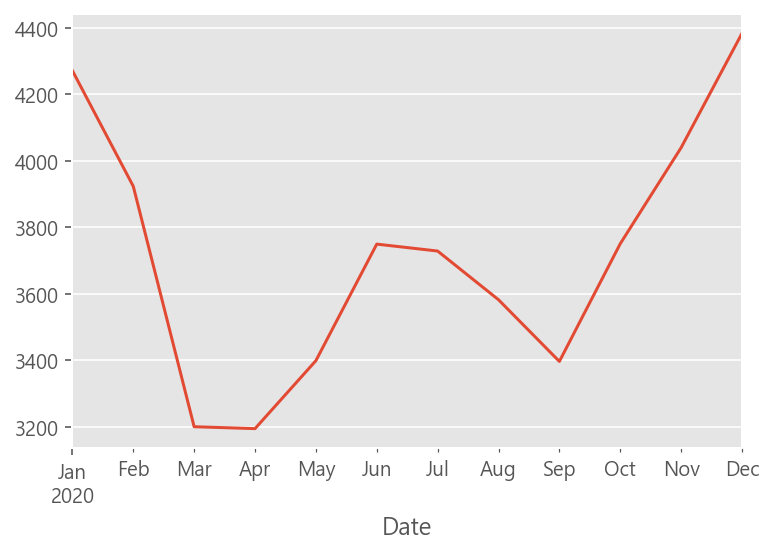

In [52]:
# 월간 평균
df["Close"].resample("M").mean().plot()

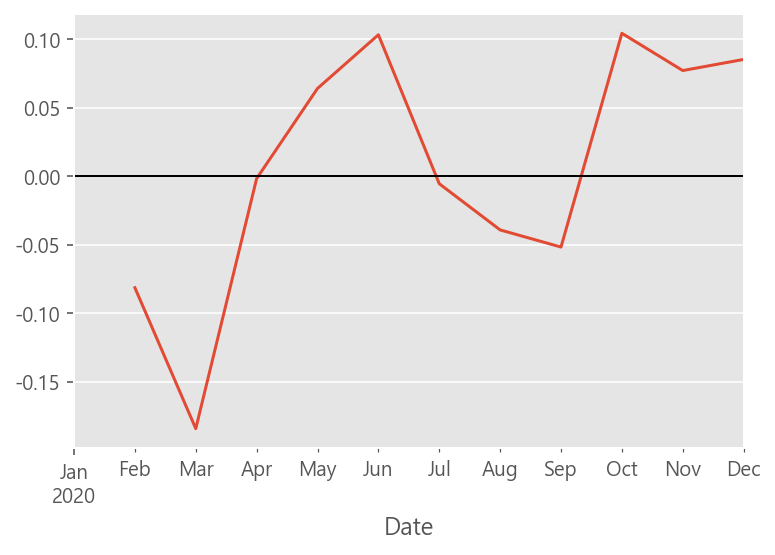

In [56]:
# 월별 평균 종가로 수익률

month_change = df["Close"].resample("M").mean().pct_change()
month_change.plot()
plt.axhline(0, c="k", lw=1)